In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as sns
import math
from random import shuffle 


from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier

import tensorflow 
from tensorflow import keras
from keras import Model
from keras.layers import Dense
from keras.layers import Flatten

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet import EfficientNetB7

from keras.applications.efficientnet import decode_predictions
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg19 import decode_predictions

from keras.applications.efficientnet import preprocess_input

from keras.preprocessing.image import load_img, img_to_array

import os


from tensorflow.keras import backend as K

os.environ["TF_KERAS"]='1'

import cv2
from PIL import Image 
import glob
import requests
import re

plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importation des images 

In [2]:
# importing images
img_dir = "/Users/mousta/Downloads/Flipkart/Images"  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path)  

In [3]:
path = '/Users/mousta/Downloads/Flipkart/Images/'

In [4]:
df = pd.read_csv("df_tokens")

In [5]:
df.head(2)

,Unnamed: 0,product_name,product_category_tree,description,image,pr_product_name,pr_description,pr_product_category_tree
0,0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing
1,1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,sathiyas cotton bath towel,specification sathiyas cotton bath towel bath ...,Baby Care


In [6]:
# regrouping images by category
images_HomeFurnishing = list(df[df["pr_product_category_tree"] == "Home Furnishing"]["image"])
images_BabyCare = list(df[df["pr_product_category_tree"] == "Baby Care"]["image"])
images_Watches = list(df[df["pr_product_category_tree"] == "Watches"]["image"])
images_HomeDecor  = list(df[df["pr_product_category_tree"] == "Home Decor & Festive Needs"]["image"])
images_Kitchen  = list(df[df["pr_product_category_tree"] == "Kitchen & Dining"]["image"])
images_Beauty  = list(df[df["pr_product_category_tree"] == "Beauty and Personal Care"]["image"])
images_Computers  = list(df[df["pr_product_category_tree"] == "Computers"]["image"])

In [7]:
images=[images_HomeFurnishing,images_BabyCare,images_Watches,images_HomeDecor,images_Kitchen,images_Beauty,images_Computers]

In [8]:
def plot_cat_images(images,title):
    '''plot images'''
    fig = plt.figure(figsize=(12,4))
    for i in range(0, 5):
        img = Image.open(path + images[i])
        ax = fig.add_subplot(1, 5, i+1)
        plt.axis('off')
        plt.imshow(img)
        ax.set_title(str(i))
    plt.suptitle(title)
    plt.show()

- Je vais représenter quelques images selon chaque catégorie :

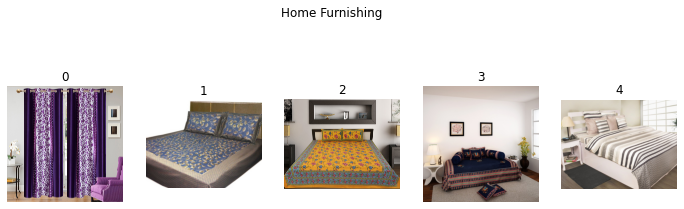

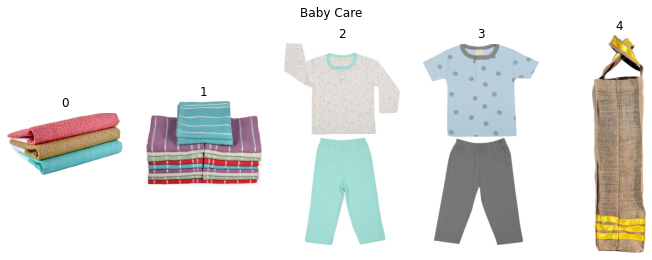

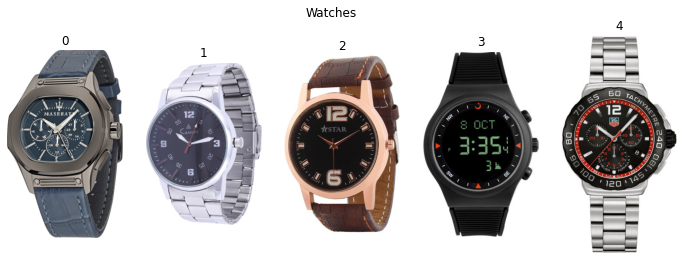

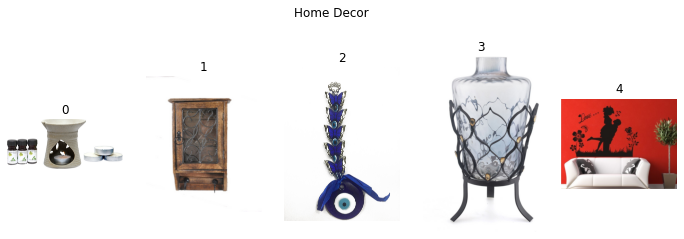

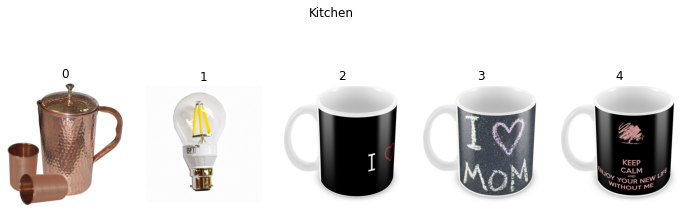

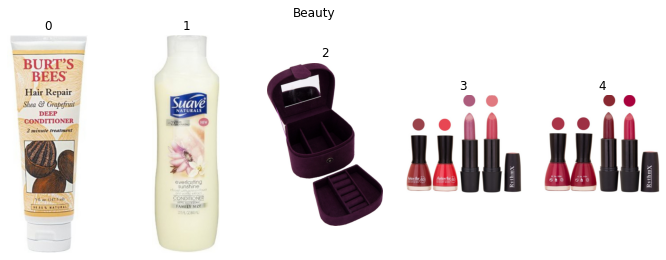

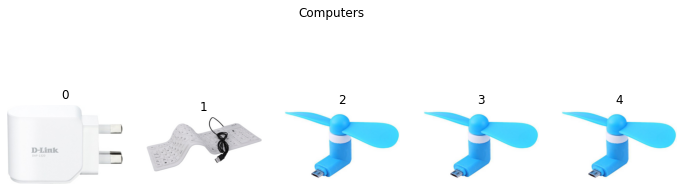

In [9]:
plot_cat_images(images_HomeFurnishing, "Home Furnishing")
plot_cat_images(images_BabyCare, "Baby Care")
plot_cat_images(images_Watches, "Watches")
plot_cat_images(images_HomeDecor, "Home Decor")
plot_cat_images(images_Kitchen, "Kitchen")
plot_cat_images(images_Beauty, "Beauty")
plot_cat_images(images_Computers, "Computers")

# 1. Scale-invariant feature transform (SIFT)

- L'algorithme SIFT permet d'extraire des features (ou points d'intérêt) de l'image et de calculer leurs descripteurs. Il permets de détecter et identifier les éléments similaires entre différentes images. 

- Je vais tester le SIFT sur des images de montres :

In [10]:
# transformation des images de montres en vecteurs
arrays_watches = []
for i in range(len(images_Watches)):
    img_arrays = cv2.imread(path + images_Watches[i])
    arrays_watches.append(img_arrays)

In [11]:
watch_1 = arrays_watches[1]
watch_2 = arrays_watches[2]

In [12]:
def hist(image1,image2, title1, title2):
    
    fig, axs = plt.subplots(1, 2, figsize=(11,4))    
    axs[0].hist(image1.flatten(),bins=50)
    axs[1].hist(image2.flatten(),bins=50)
    
    axs[0].title.set_text(title1)
    axs[1].title.set_text(title2)

    return plt.show()

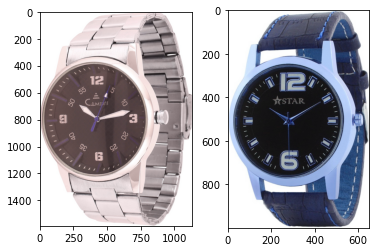

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(6,4)) 
axs[0].imshow(watch_1)
axs[1].imshow(watch_2)

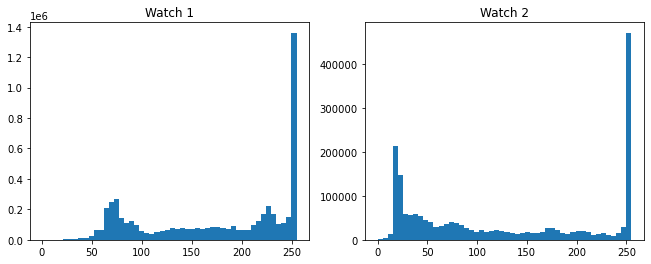

In [14]:
hist(watch_1,watch_2, "Watch 1", "Watch 2")

In [15]:
def grey(array):
    return cv2.cvtColor(array, cv2.COLOR_BGR2GRAY)

In [16]:
gray_watch_1 = grey(arrays_watches[1])
gray_watch_2 = grey(arrays_watches[2])

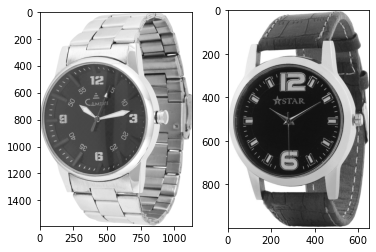

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(6,4)) 
axs[0].imshow(gray_watch_1,cmap='gray')
axs[1].imshow(gray_watch_2,cmap='gray')

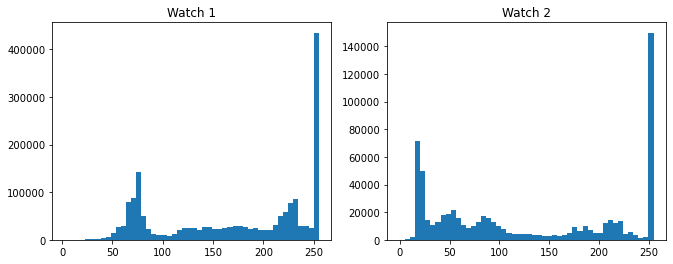

In [18]:
hist(gray_watch_1,gray_watch_2, "Watch 1", "Watch 2")

In [19]:
def equalize(array):
    return cv2.equalizeHist(array)

In [20]:
watch_1_gray_equalize = equalize(gray_watch_1)
watch_2_gray_equalize = equalize(gray_watch_2)

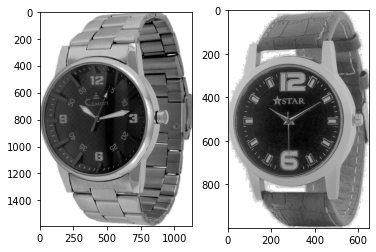

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(6,4)) 
axs[0].imshow(watch_1_gray_equalize,cmap='gray')
axs[1].imshow(watch_2_gray_equalize,cmap='gray')

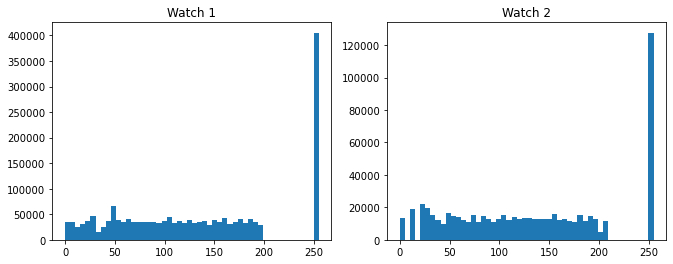

In [22]:
hist(watch_1_gray_equalize,watch_2_gray_equalize, "Watch 1", "Watch 2")

In [23]:
def resize_300_400(array):
    return cv2.resize(array , dsize=(300,400))

In [24]:
gray_watch_1_equalize_resize = resize_300_400(watch_1_gray_equalize)

In [25]:
gray_watch_2_equalize_resize = resize_300_400(watch_2_gray_equalize)

In [26]:
def blur(array):
    return cv2.blur(array,(15, 15))

In [27]:
watch_1_gray_equalize_blur = blur(gray_watch_1_equalize_resize)
watch_2_gray_equalize_blur = blur(gray_watch_2_equalize_resize)

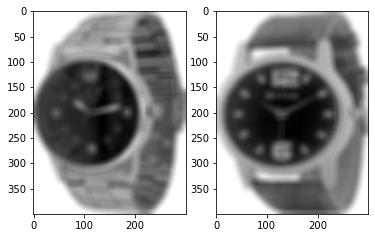

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(6,4)) 
axs[0].imshow(watch_1_gray_equalize_blur,cmap='gray')
axs[1].imshow(watch_2_gray_equalize_blur,cmap='gray')

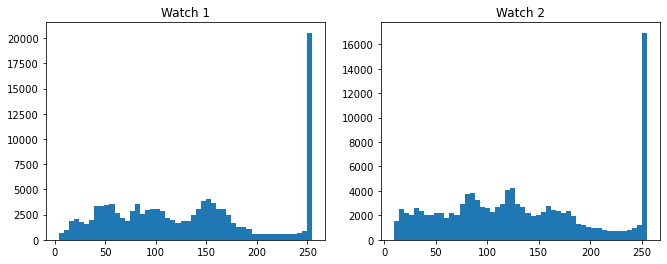

In [29]:
hist(watch_1_gray_equalize_blur,watch_2_gray_equalize_blur, "Watch 1", "Watch 2")

In [30]:
sift = cv2.xfeatures2d.SIFT_create()

In [31]:
keypoints_1, descriptors_1 = sift.detectAndCompute(gray_watch_1_equalize_resize, None)

In [32]:
keypoints_1_gray, descriptors_1_gray = sift.detectAndCompute(gray_watch_1_equalize_resize, None)
keypoints_2_gray, descriptors_2_gray = sift.detectAndCompute(gray_watch_2_equalize_resize, None)

In [33]:
sift_image_watch_1 = cv2.drawKeypoints(gray_watch_1_equalize_resize, keypoints_1_gray,watch_1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [34]:
print("Le nombre de - features - points clés trouvés dans l'image: {} features".format(len(descriptors_1_gray)))

Le nombre de - features - points clés trouvés dans l'image: 501 features


(-0.5, 299.5, 399.5, -0.5)

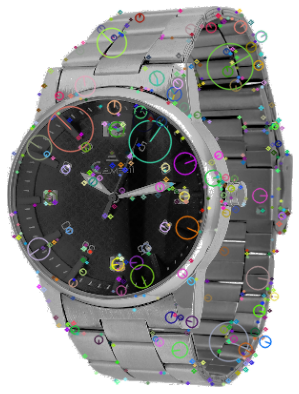

In [35]:
plt.figure(figsize=(7,7))
plt.imshow(sift_image_watch_1)
plt.axis('off')

In [36]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # Norm L2 is the euclidean distance 

In [37]:
matches_gray = bf.match(descriptors_1_gray,descriptors_2_gray)

In [38]:
matches_gray = sorted(matches_gray, key = lambda x:x.distance)
# draw first 50 matches
matched_img_gray = cv2.drawMatches(gray_watch_1_equalize_resize, keypoints_1_gray, gray_watch_2_equalize_resize, keypoints_2_gray, matches_gray[:50], gray_watch_2_equalize_resize, flags=2)




(-0.5, 599.5, 399.5, -0.5)

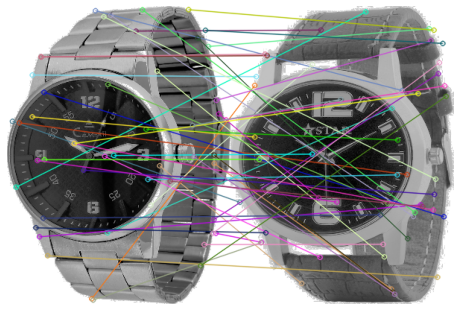

In [39]:
plt.figure(figsize=(8,8))
plt.imshow(matched_img_gray)
plt.axis('off')

In [40]:
print("Le nombre de - features - points clés communs aux deux images: {} features".format(len(matches_gray)))

Le nombre de - features - points clés communs aux deux images: 126 features


In [41]:
watch_1_rotate_1 = Image.open(path + images_Watches[1])
watch_1_rotate_2 = watch_1_rotate_1.rotate(30)
watch_1_rotate_3 = np.array(watch_1_rotate_2)
watch_1_rotate_4 = grey(watch_1_rotate_3)
watch_1_rotate_5 = cv2.resize(watch_1_rotate_4 , dsize=(300,400))

In [42]:
kp_gray_rotate, des_gray_rotate = sift.detectAndCompute(watch_1_rotate_5, None)

In [43]:
matches_gray_rotate = bf.match(descriptors_1_gray,des_gray_rotate)

In [44]:
matches_gray_rotate = sorted(matches_gray_rotate, key = lambda x:x.distance)
# draw first 50 matches
matched_img_gray_rotate = cv2.drawMatches(gray_watch_1_equalize_resize, keypoints_1_gray, watch_1_rotate_5, kp_gray_rotate, matches_gray_rotate[:50], watch_1_rotate_5, flags=2)

(-0.5, 599.5, 399.5, -0.5)

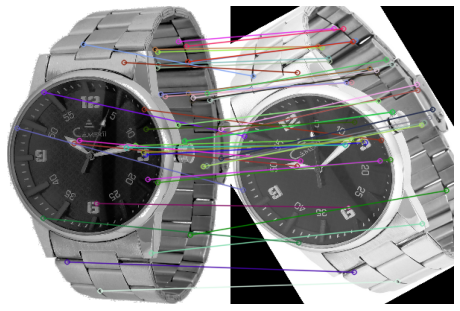

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(matched_img_gray_rotate)
plt.axis('off')

In [46]:
print("Le nombre de - features - points clés communs aux deux images: {} features".format(len(matches_gray_rotate)))

Le nombre de - features - points clés communs aux deux images: 206 features


On peut voir que le SIFT permet de detecter les features caractéristiques de chaque images ainsi que les features communs entre 2 images. Je vais maintenant utiliser le SIFT pour extraire les features de toutes les images.

### 1.1- Extraction des points d'interêt

In [47]:
descriptors_unclustered = []

In [48]:
sift = cv2.SIFT_create(500)

for i in range(len(df.image)):
    image = cv2.imread(path + df.image[i],0)
    im_equalize = cv2.equalizeHist(image)
    im_resize = cv2.resize(im_equalize, (255, 255))
    kp, dsc = sift.detectAndCompute(im_resize, None)
    descriptors_unclustered.append(dsc)

In [49]:
sift_keypoints_by_img = np.asarray(descriptors_unclustered)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)

<ipython-input-49-6484bf35b901>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(descriptors_unclustered)


### 1.2- Clustering

Nous avons maintenant une matrice avec un grand nombre de descripteurs. Nous ne pouvons pas tous les utiliser la modélisation, nous devons donc les regrouper. Une règle empirique consiste à créer k centres avec k = nombre de catégories * 10 (dans notre cas, c'est 70)

In [50]:
im_kmeans = MiniBatchKMeans(n_clusters=70, init_size=3*70, verbose=1).fit(sift_keypoints_all)

Init 1/3 with method: k-means++
Inertia for init 1/3: 13337048.000000
Init 2/3 with method: k-means++
Inertia for init 2/3: 12875702.000000
Init 3/3 with method: k-means++
Inertia for init 3/3: 13570887.000000
Minibatch iteration 1/357900: mean batch inertia: 105604.100000, ewa inertia: 105604.100000 
Minibatch iteration 2/357900: mean batch inertia: 98398.750000, ewa inertia: 105600.073056 
Minibatch iteration 3/357900: mean batch inertia: 93041.260000, ewa inertia: 105593.054156 
Minibatch iteration 4/357900: mean batch inertia: 94252.380000, ewa inertia: 105586.716052 
Minibatch iteration 5/357900: mean batch inertia: 94322.420000, ewa inertia: 105580.420635 
Minibatch iteration 6/357900: mean batch inertia: 94576.150000, ewa inertia: 105574.270541 
Minibatch iteration 7/357900: mean batch inertia: 89722.580000, ewa inertia: 105565.411309 
Minibatch iteration 8/357900: mean batch inertia: 87808.070000, ewa inertia: 105555.487042 
Minibatch iteration 9/357900: mean batch inertia: 951

### 1.3- Création des histogrammes

In [51]:
def build_histogram(im_kmeans, des, image_num):
    res = im_kmeans.predict(des)
    hist = np.zeros(len(im_kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : 
        print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

In [52]:
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    hist = build_histogram(im_kmeans, image_desc, i) # calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

### 1.4- Réductions de dimension

#### PCA

In [53]:
pca = PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)

#### TSNE

In [54]:
def plot_kmeans_tsne(reduction):
    kmeans_tsne = KMeans(n_clusters=7, n_init=50, max_iter=200,init='k-means++', random_state=42).fit(reduction)
    labels_tsne = kmeans_tsne.labels_
    cl_tsne = pd.concat([reduction,pd.DataFrame({'tsne_clusters':labels_tsne})],axis=1)
    
    df['cluster'] = labels_tsne
    categories_predict = df['cluster']
    categories_true = df['pr_product_category_tree']
    adjusted_rand = metrics.adjusted_rand_score(categories_true, categories_predict)
    print("\033[1mAdjusted Rand Index: %0.3f\033[0m" % adjusted_rand)
    
    fig = plt.figure(figsize=(21,8))
    ax = fig.add_subplot(121)

    scatter = sns.scatterplot(x= cl_tsne.iloc[:,0],y = cl_tsne.iloc[:,1], hue = categories_true,
                        palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)
    
    plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.01, title='catégories réelles',fontsize='small',fancybox=True)

    plt.title('Représentation selon les vraies classes',fontsize=22)
    
 
    
    ax = fig.add_subplot(122)
    
    scatter = sns.scatterplot(x = cl_tsne.iloc[:,0],y = cl_tsne.iloc[:,1],data = cl_tsne, hue=categories_predict,
                        palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

    plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.01, title='clusters', fontsize='small', fancybox=True)

    plt.title('Représentation selon les clusters',fontsize=22)

            
    return plt.show()

In [55]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80,n_iter=5000, learning_rate=200, random_state=0)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.003s...
[t-SNE] Computed neighbors for 1050 samples in 0.227s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 0.042852
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.108871
[t-SNE] KL divergence after 1800 iterations: 1.169665
(1050, 2)


Adjusted Rand Index: 0.055


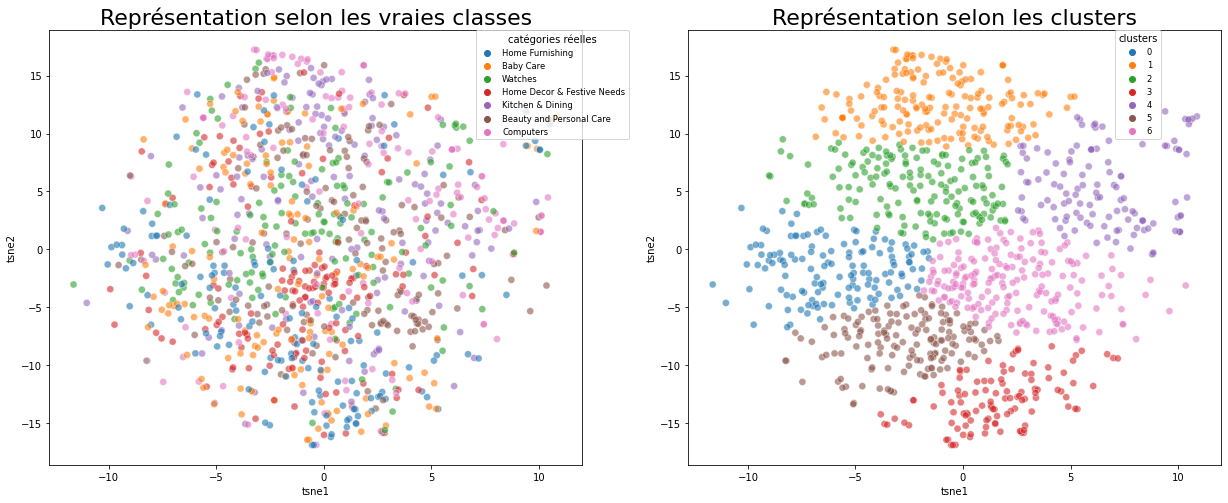

In [56]:
plot_kmeans_tsne(df_tsne)

# Transfer learning Convolutional Neural Network

## VGG16

Le transfer learning permet de faire du Deep Learning sans avoir besoin d'y passer beaucoup de temps. Cette technique consiste à utiliser un réseau de neurones déjà entrainé sur une autre base de données. Je vais utiliser le VGG16 pour extraire les features des images. 

L'architecture du VGG16 à besoin en entrée 'input' des images de taille 224,224 pour cela je vais changer la taille des images.

In [57]:
images = []

for i in range(len(df.image)):
    image = cv2.imread(path + df.image[i])
    image = cv2.resize(image, dsize=(224,224))
    images.append(image)

In [58]:
images = np.asarray(images)

In [59]:
images.shape

(1050, 224, 224, 3)

Je vais maintenant supprimer la dernière couche dense qui permet de classifier les images en 1000 catégories, cela nous permet de garder en output une couche qui permet d'extraire un plus nombre de features

In [60]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
features_VGG16 = model.predict(images)

In [61]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [62]:
features_VGG16.shape

(1050, 4096)

In [63]:
features_VGG16_df = pd.DataFrame(features_VGG16)

In [64]:
features_VGG16_df.to_csv("VGG_features")

### Réductions de dimension

In [65]:
pca = PCA(n_components=0.99)
CNN_ft_VGG16_pca= pca.fit_transform(features_VGG16)

In [66]:
X_tsne_VGG16 = tsne.fit_transform(CNN_ft_VGG16_pca)

df_tsne_VGG16 = pd.DataFrame(X_tsne_VGG16[:,0:2], columns=['tsne1', 'tsne2'])
print(df_tsne_VGG16.shape)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.079s...
[t-SNE] Computed neighbors for 1050 samples in 2.771s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 35.310644
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.159904
[t-SNE] KL divergence after 3350 iterations: 0.886649
(1050, 2)


Adjusted Rand Index: 0.474


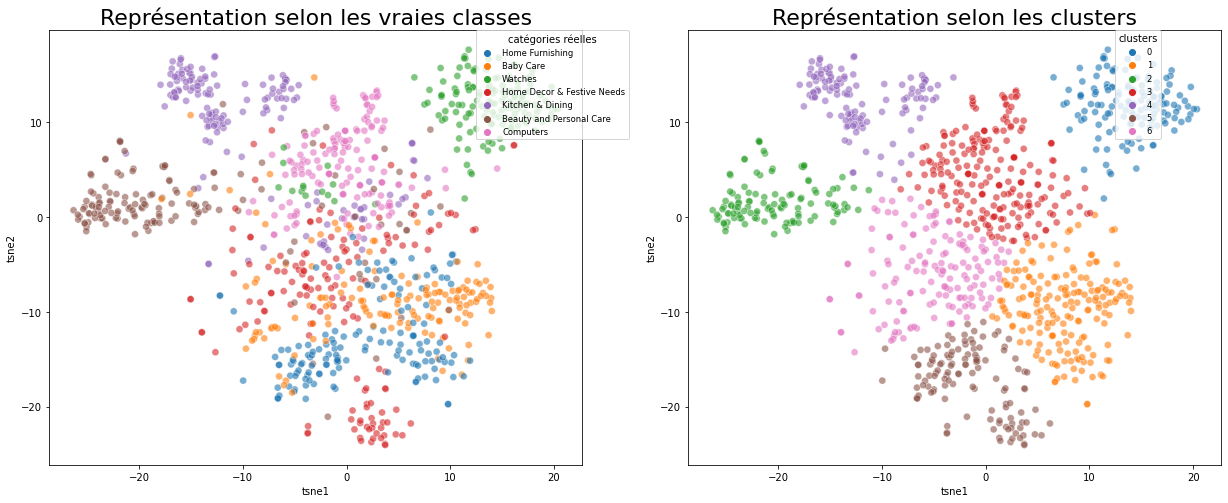

In [67]:
plot_kmeans_tsne(df_tsne_VGG16)

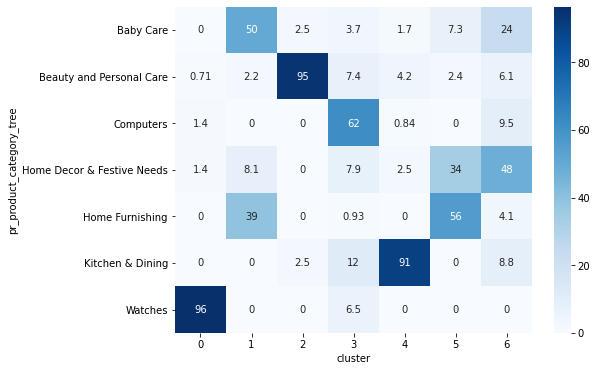

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['pr_product_category_tree'], df['cluster']).apply(lambda c: c*100/c.sum(), axis=0),
            annot=True,
            cmap="Blues")
plt.show()

**Le CNN permet d'extraire mieux les features des images par rapport au SIFT ce qui permet une meilleure classification**